In [1]:
# Importing required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Loading the MNist datasets
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Length of training data
len(X_train)

60000

In [4]:
# Length of testing data
len(X_test)

10000

In [5]:
# Shape of a each data in the dataset
X_train[0].shape

(28, 28)

Number is 5


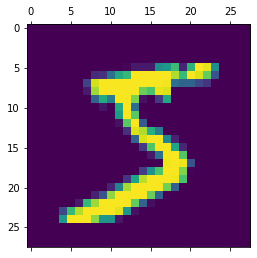

In [6]:
# Checking the training image using pyplot
plt.matshow(X_train[0])
print ("Number is",y_train[0])

Number is 0


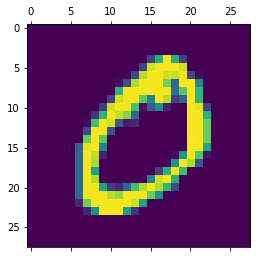

In [7]:
plt.matshow(X_train[1])
print ("Number is",y_train[1])

In [8]:
# Before Flattening
print ("Train set - Samples {}, X-dimension {}, Y-dimension {}".format(X_train.shape[0],X_train.shape[1],X_train.shape[2]))
print ("Test set  - Samples {}, X-dimension {}, Y-dimension {}".format(X_test.shape[0],X_test.shape[1],X_test.shape[2]))

Train set - Samples 60000, X-dimension 28, Y-dimension 28
Test set  - Samples 10000, X-dimension 28, Y-dimension 28


In [9]:
# Flattening the shape of X_train and X_test
flatten_X_train = X_train.reshape(len(X_train),28*28)
flatten_X_test = X_test.reshape(len(X_test),28*28)

In [10]:
print ("Train set - Samples {}, dimension {}".format(flatten_X_train.shape[0],flatten_X_train.shape[1]))
print ("Test set  - Samples {}, dimension {}".format(flatten_X_test.shape[0],flatten_X_test.shape[1]))

Train set - Samples 60000, dimension 784
Test set  - Samples 10000, dimension 784


### Training and Predicting Without scaling

In [11]:
# Without the hidden layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid') 
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(flatten_X_train, y_train, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 2.2200 - accuracy: 0.4191
Epoch 2/5
60000/60000 [==============================] - 5s 79us/sample - loss: 1.5906 - accuracy: 0.4645
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 1.5712 - accuracy: 0.4795
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 1.5738 - accuracy: 0.4759
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 1.5213 - accuracy: 0.4928


### Training and Predicting with scaling

In [12]:
# Scaling
X_train = X_train/255
X_test = X_test/255

In [13]:
# Flattening the shape of X_train and X_test
flatten_X_train = X_train.reshape(len(X_train),28*28)
flatten_X_test = X_test.reshape(len(X_test),28*28)

In [14]:
# Without the hidden layer
model_scaled = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid') 
])

model_scaled.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_scaled.fit(flatten_X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4849 - accuracy: 0.8791
Epoch 2/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3063 - accuracy: 0.9159
Epoch 3/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2856 - accuracy: 0.9211
Epoch 4/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2748 - accuracy: 0.9247
Epoch 5/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2678 - accuracy: 0.9259


#### _*We can see that scaling increased the accuracy of the model*_

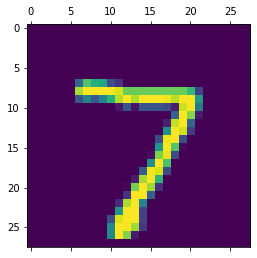

In [15]:
# Verifying the test prediction
plt.matshow(X_test[0])

In [16]:
y_predicted = model_scaled.predict(flatten_X_test)
y_predicted[0]

array([1.3887882e-05, 0.0000000e+00, 5.7399273e-05, 8.7403655e-03,
       1.1026859e-06, 7.1734190e-05, 0.0000000e+00, 8.0496824e-01,
       6.1333179e-05, 7.7587366e-04], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

### Building the confusion matrix

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [19]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: id=57793, shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   3,   11,  930,   17,    7,    3,   13,    9,   34,    5],
       [   3,    0,   17,  927,    0,   19,    2,   13,   23,    6],
       [   1,    2,    4,    1,  916,    0,   10,    4,    8,   36],
       [   8,    2,    5,   42,   10,  766,   13,    8,   32,    6],
       [   9,    3,    5,    1,    7,   12,  916,    2,    3,    0],
       [   1,    7,   26,    6,    7,    0,    0,  945,    1,   35],
       [   7,   11,    6,   22,    9,   20,    9,   14,  866,   10],
       [   8,    7,    2,   12,   27,    5,    0,   24,    5,  919]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

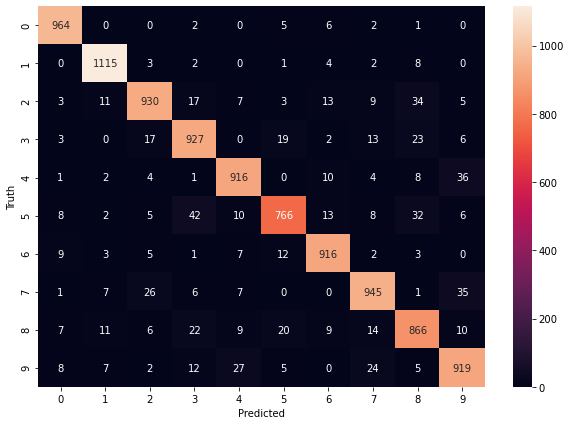

In [22]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Adding the Hidden Layer

In [23]:
# With Hidden layer
model_scaled = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model_scaled.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_scaled.fit(flatten_X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2922 - accuracy: 0.9190
Epoch 2/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1367 - accuracy: 0.9601
Epoch 3/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0984 - accuracy: 0.9709
Epoch 4/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0768 - accuracy: 0.9774
Epoch 5/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0614 - accuracy: 0.9817


In [24]:
y_predicted = model_scaled.predict(flatten_X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)


Text(69.0, 0.5, 'Truth')

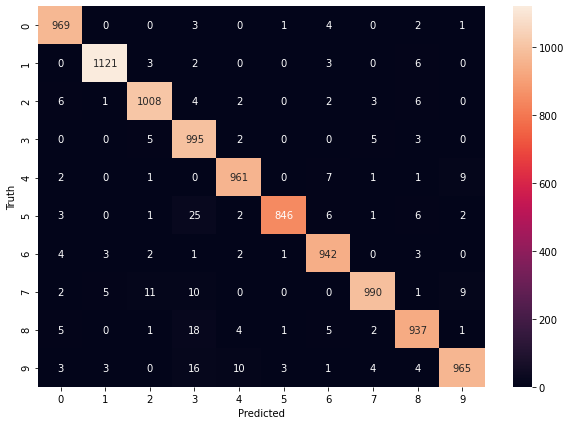

In [25]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Training and Predicting Using the inbuilt Flatten function

In [26]:
# Adding the flatten layer in Keras and also with the other Hidden layer
model_scaled = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model_scaled.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_scaled.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2982 - accuracy: 0.9161
Epoch 2/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1413 - accuracy: 0.9593
Epoch 3/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1014 - accuracy: 0.9707
Epoch 4/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0793 - accuracy: 0.9762
Epoch 5/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0644 - accuracy: 0.9800


In [27]:
y_predicted = model_scaled.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

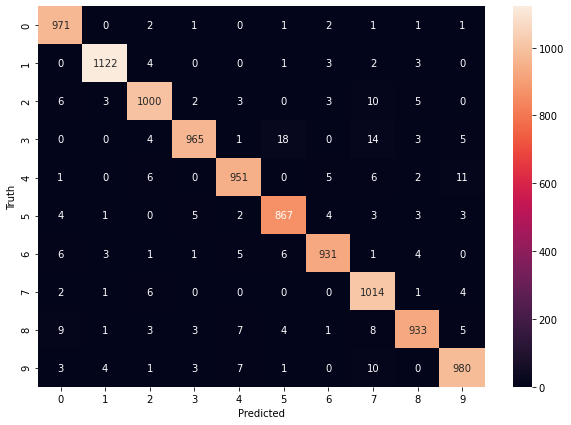

In [28]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")